In [117]:
import pandas as pd
import random
import datetime as dt
import requests
from bs4 import BeautifulSoup
import difflib

import matplotlib.pyplot as plt
%matplotlib inline

random.seed(1)

# Simulate some survey data

In [2]:
df = pd.DataFrame(columns=['respondentnummer',
'geslacht',
'chronisch_ziek',
'gebdatum',
'zorgverlener',
'rapportcijfer',
'opleidingsniveau'])

In [3]:
df.respondentnummer = range(1, 501)
df.geslacht = random.choices([0, 1, 11, -99], weights=[55, 45, 1, 2], k=500)
df.geslacht[6] = -99
df.geslacht[9] = 11


df.chronisch_ziek = random.choices([0, 1, 10, 11, -99], weights=[39, 58, 2, 1, 2], k=500)
df.chronisch_ziek[8] = -99


df.zorgverlener = random.choices(["huisarts", "Huisarts","HUisarts", 
                                  "specialist", "specialist azm", "Specialist", "SPECIALISTE",
                                  "poh", "praktijkondersteuner", "poh GGZ", 
                                  "Fysiotherapeut", "Fysio", "fysiotherapeut"],
              weights=[30, 20, 1,
                       15, 1, 10, 1,
                       10, 12, 1,
                       5, 2, 3],
              k=500)
# zorg dat op regel 10 'praktijkondersteuner' staat
df.zorgverlener[9] = 'praktijkondersteuner'
# en zorg dat de verschillende manieren van spelling zichtbaar zijn in de eerste regels.
df.zorgverlener[1] = 'Huisarts'
df.zorgverlener[4] = 'Specialist'


df.rapportcijfer = random.choices(range(11), weights=[1, 2, 2, 2, 4, 10, 35, 43, 47, 40, 10], k=500)
df.rapportcijfer = df.rapportcijfer.astype('float64')
# twee outliers
df.rapportcijfer[40] = 80
df.rapportcijfer[300] = 75
# twee perfectionisten
df.rapportcijfer[5] = 7.45
df.rapportcijfer[9] = 5.5
df.rapportcijfer[range(350, 500, 4)] = -99


df.opleidingsniveau = random.choices([1, 2, 3, 4, -99], weights=[20, 20, 30, 2, 5], k=500)
df.opleidingsniveau[4] = 13

# https://www.daveoncode.com/2013/05/20/generate-random-dates-in-python-using-datetime-and-random-modules/
def random_birthdate(startdate=dt.date(1940, 1, 1), enddate=dt.date(2000, 1, 1)):
    nbdays=(enddate-startdate).days
    d=random.randint(0, nbdays)
    return startdate+dt.timedelta(days=d)

birthdates = []
for i in range(500):
    birthdates.append(random_birthdate())
    
df.gebdatum = birthdates
df.gebdatum[range(10, 40, 3)] = dt.date(1800, 1, 1)

C:\Users\niels.hameleers\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\niels.hameleers\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\niels.hameleers\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.

# Check the result

In [4]:
df.head(12)

,respondentnummer,geslacht,chronisch_ziek,gebdatum,zorgverlener,rapportcijfer,opleidingsniveau
0,1,0,1,1946-04-27,Huisarts,9.00,2
1,2,1,0,1960-09-18,Huisarts,10.00,4
2,3,1,1,1950-10-01,huisarts,9.00,3
3,4,0,0,1986-12-21,specialist,5.00,1
4,5,0,1,1981-08-03,Specialist,7.00,13
5,6,0,1,1989-11-22,Fysio,7.45,1
6,7,-99,0,1981-02-14,specialist,9.00,3
7,8,1,1,1940-11-16,Specialist,6.00,3
8,9,0,-99,1993-11-30,huisarts,7.00,3
9,10,11,1,1955-01-14,praktijkondersteuner,5.50,1


In [5]:
df.tail(10)

,respondentnummer,geslacht,chronisch_ziek,gebdatum,zorgverlener,rapportcijfer,opleidingsniveau
490,491,0,1,1976-06-09,huisarts,-99.0,1
491,492,1,10,1951-01-22,huisarts,7.0,3
492,493,1,0,1990-09-23,Huisarts,7.0,3
493,494,1,1,1941-07-27,poh,6.0,2
494,495,1,1,1941-01-12,huisarts,-99.0,1
495,496,11,1,1989-12-22,huisarts,9.0,3
496,497,0,1,1993-06-09,Huisarts,4.0,2
497,498,0,0,1976-08-23,specialist,6.0,3
498,499,1,0,1971-03-30,poh,-99.0,2
499,500,0,1,1955-10-02,Huisarts,7.0,1


In [6]:
df.geslacht.value_counts()

 0     263
 1     219
-99     11
 11      7
Name: geslacht, dtype: int64

In [7]:
df.chronisch_ziek.value_counts()

 1     305
 0     165
-99     13
 10     10
 11      7
Name: chronisch_ziek, dtype: int64

In [8]:
df.zorgverlener.value_counts()

huisarts                130
Huisarts                 93
specialist               73
praktijkondersteuner     57
Specialist               53
poh                      35
Fysiotherapeut           17
fysiotherapeut           13
Fysio                     9
poh GGZ                   9
specialist azm            5
SPECIALISTE               4
HUisarts                  2
Name: zorgverlener, dtype: int64

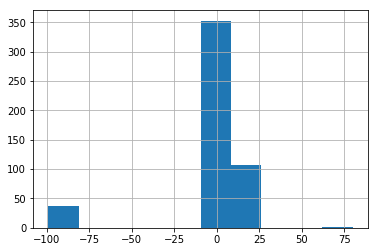

In [9]:
df.rapportcijfer.hist();

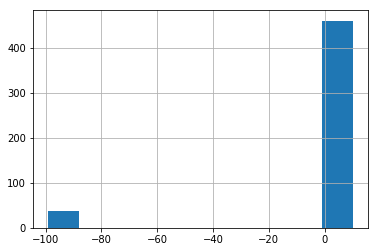

In [10]:
df.rapportcijfer[df.rapportcijfer < 11].hist();

In [11]:
df.rapportcijfer.mean()

-0.6321000000000003

In [12]:
df.opleidingsniveau.value_counts()

 3     208
 1     130
 2     120
-99     29
 4      12
 13      1
Name: opleidingsniveau, dtype: int64

In [13]:
df.iloc[:10, ].to_csv('2018-12-23_pat_tevr.csv', index=False)

In [14]:
df.to_csv('2019-01-02_pat_tevr.csv', index=False)

# Simulate data for text manipulation exercise

Input van Rachelle

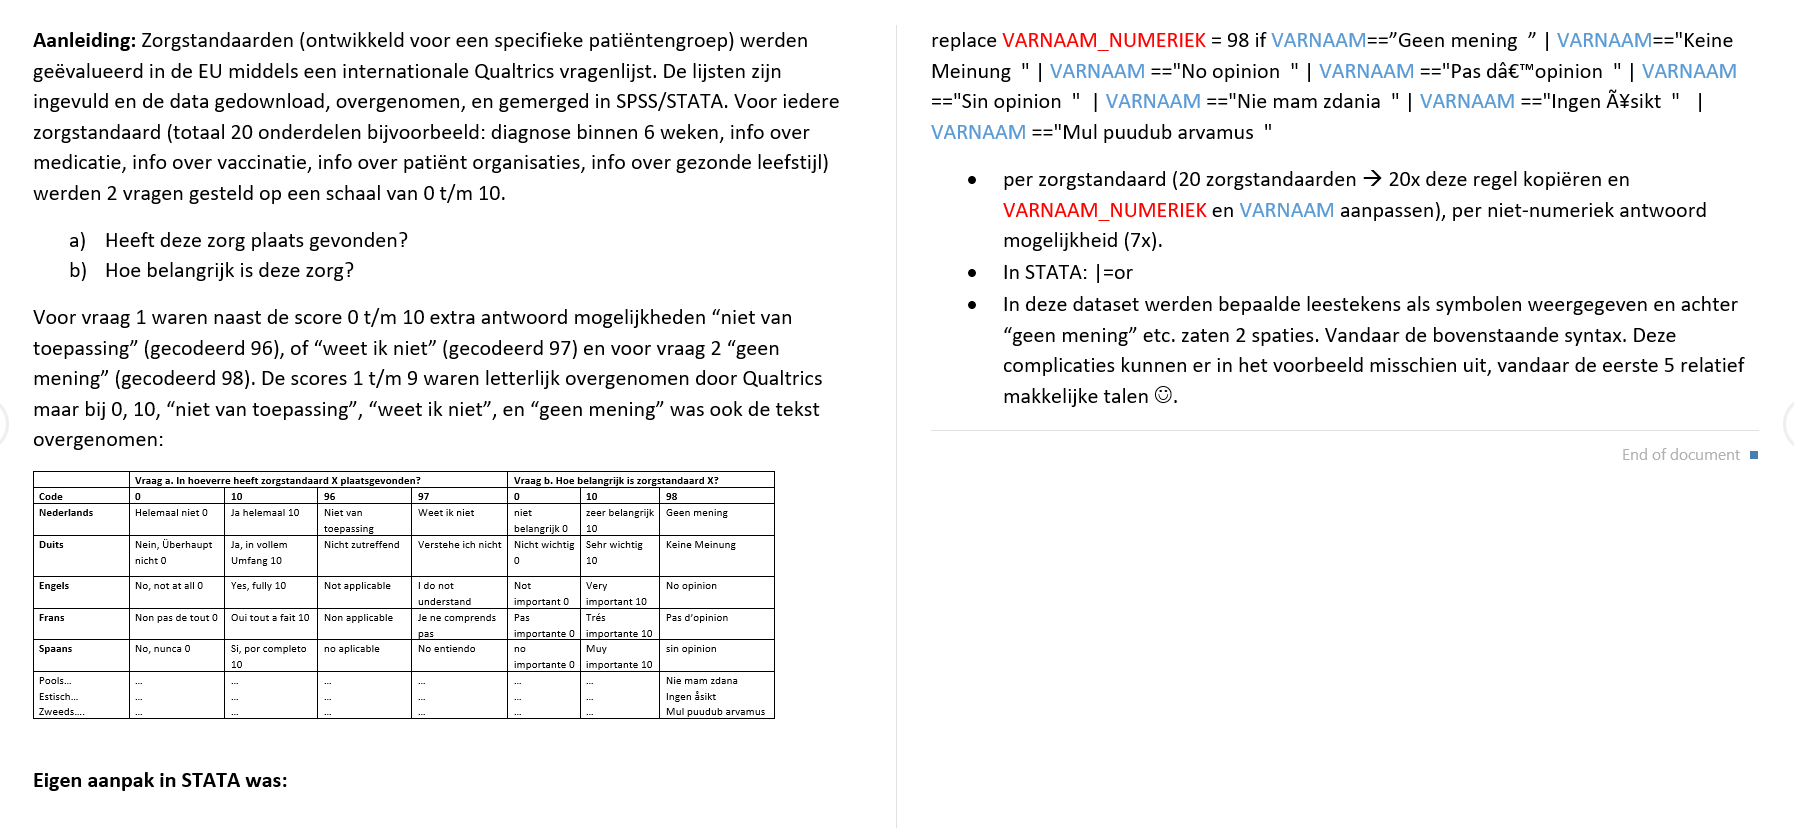

Wat kunnen we hiermee:
* Als substring in string... (‘10’ in ‘Ja helemaal 10’)
* Cijfers uit tekst halen (CHAR.SUBSTR)
* Cijfer naar nummer (NUMBER)
* Spaties weghales (TRIM, LTRIM, RTRIM)
* DO REPEAT: 1 stuk syntax voor 20 zorgstandaarden (1 stuk voor V1, en nog een voor V2)
* Gebruik een stuk syntax dat iemand anders (Rachelle in dit geval) al geschreven heeft.

* Werk altijd een klein voorbeeld uit, maak dat vervolgens dynamisch



Variabele namen moeten ‘loopable’ zijn, dus

V1_zorgstandaard_1	(VARIABLE LABELS ‘diagnose binnen 6 weken’) 

V1_zorgstandaard_2	(VARIABLE LABELS ‘info over medicatie’)

...

V1_zorgstandaard_20

V2_zorgstandaard_1

V2_zorgstandaard_2

...

V2_zorgstandaard_20



In [237]:
zsa_opties = ['Helemaal niet 0',
'Nein, Überhaupt nicht 0',
'No, not at all 0',
'Non pas de tout 0',
'No, nunca 0',
'Ja helemaal 10',
'Ja, in vollem Umfang 10',
'Yes, fully 10',
'Oui tout a fait 10',
'Si, por completo 10',
'Niet van toepassing',
'Nicht zutreffend',
'Not applicable',
'Non applicable',
'No aplicable',
'Weet ik niet',
'Verstehe ich nicht',
'I do not understand',
'Je ne comprends pas',
'No entiendo'] + [str(i) for i in range(2,10)]

zsa_weights = [random.uniform(1, 4) for i in range(len(zsa_opties) - 8)] + [random.uniform(1, 4) * 5 for i in range(8)]

zsa_opties

['Helemaal niet 0',
 'Nein, Überhaupt nicht 0',
 'No, not at all 0',
 'Non pas de tout 0',
 'No, nunca 0',
 'Ja helemaal 10',
 'Ja, in vollem Umfang 10',
 'Yes, fully 10',
 'Oui tout a fait 10',
 'Si, por completo 10',
 'Niet van toepassing',
 'Nicht zutreffend',
 'Not applicable',
 'Non applicable',
 'No aplicable',
 'Weet ik niet',
 'Verstehe ich nicht',
 'I do not understand',
 'Je ne comprends pas',
 'No entiendo',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9']

In [238]:
zsb_opties = ['niet belangrijk 0',
'Nicht wichtig 0',
'Not important 0',
'Pas importante 0',
'no importante 0',
'zeer belangrijk 10',
'Sehr wichtig 10',
'Very important 10',
'Trés importante 10',
'Muy importante 10',
'Geen mening  ',
'Keine Meinung  ',
'No opinion  ',
'Pas d’opinion  ',
'sin opinion  ',
'Ingen Ã¥sikt  '] + [str(i) for i in range(2,10)]

zsb_weights = [random.uniform(1, 4) for i in range(len(zsb_opties) - 8)] + [random.uniform(1, 4) * 5 for i in range(8)]

zsb_opties

['niet belangrijk 0',
 'Nicht wichtig 0',
 'Not important 0',
 'Pas importante 0',
 'no importante 0',
 'zeer belangrijk 10',
 'Sehr wichtig 10',
 'Very important 10',
 'Trés importante 10',
 'Muy importante 10',
 'Geen mening  ',
 'Keine Meinung  ',
 'No opinion  ',
 'Pas d’opinion  ',
 'sin opinion  ',
 'Ingen Ã¥sikt  ',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9']

In [239]:
random.seed(1)

In [240]:
z_columns = ["VA_Zorgstandaard" + str(i) for i in range(1, 11)] + ["VB_Zorgstandaard" + str(i) for i in range(1, 11)]

z = pd.DataFrame(columns=z_columns)

In [241]:
for col in z.columns:
    if col.startswith("VA"):
        z[col] = random.choices(zsa_opties,
                                weights=zsa_weights,
                                k=500)
    elif col.startswith("VB"):
        z[col] = random.choices(zsb_opties,
                               weights=zsb_weights,
                               k=500)

In [242]:
z

,VA_Zorgstandaard1,VA_Zorgstandaard2,VA_Zorgstandaard3,VA_Zorgstandaard4,VA_Zorgstandaard5,VA_Zorgstandaard6,VA_Zorgstandaard7,VA_Zorgstandaard8,VA_Zorgstandaard9,VA_Zorgstandaard10,VB_Zorgstandaard1,VB_Zorgstandaard2,VB_Zorgstandaard3,VB_Zorgstandaard4,VB_Zorgstandaard5,VB_Zorgstandaard6,VB_Zorgstandaard7,VB_Zorgstandaard8,VB_Zorgstandaard9,VB_Zorgstandaard10
0,Oui tout a fait 10,4,3,8,2,Ja helemaal 10,6,9,9,4,8,4,Muy importante 10,4,sin opinion,9,8,9,9,9
1,8,2,Oui tout a fait 10,9,9,Weet ik niet,8,"Si, por completo 10",Helemaal niet 0,4,3,4,5,2,4,9,9,sin opinion,Pas d’opinion,8
2,7,5,Non applicable,8,8,5,6,9,No entiendo,9,9,Nicht wichtig 0,5,9,2,zeer belangrijk 10,No opinion,4,Not important 0,Nicht wichtig 0
3,I do not understand,Helemaal niet 0,5,Ja helemaal 10,Nicht zutreffend,7,8,9,3,6,Geen mening,Ingen Ã¥sikt,7,9,8,Geen mening,7,7,8,4
4,4,3,6,2,6,5,Niet van toepassing,2,2,9,Pas importante 0,8,8,4,Keine Meinung,4,Pas d’opinion,8,Not important 0,zeer belangrijk 10
5,3,3,9,9,Nicht zutreffend,Helemaal niet 0,Je ne comprends pas,9,No aplicable,"Si, por completo 10",Geen mening,5,5,9,7,5,8,Keine Meinung,7,8
6,6,2,5,8,8,9,8,9,9,6,Ingen Ã¥sikt,4,8,9,4,Geen mening,5,3,7,9
7,8,3,6,Oui tout a fait 10,5,3,2,8,5,Je ne comprends pas,Geen mening,8,9,sin opinion,Muy importante 10,2,9,8,sin opinion,5
8,"Ja, in vollem Umfang 10",8,"Si, por completo 10",3,8,5,7,5,9,"Nein, Überhaupt nicht 0",5,Geen mening,8,9,3,4,6,5,9,Nicht wichtig 0
9,"No, not at all 0",7,3,2,"No, nunca 0",Not applicable,5,8,5,Helemaal niet 0,8,Geen mening,5,niet belangrijk 0,2,8,4,Very important 10,3,9


In [243]:
z.to_csv('../SPSS cursus/data/Brondata/zorgstandaarden.csv', index=False, encoding='utf8')

# Emaildata

In [226]:
random.seed(1)

In [109]:
r = requests.get('https://www.tweedekamer.nl/kamerleden_en_commissies/alle_kamerleden')
r.status_code

200

In [110]:
soup = BeautifulSoup(r.text, 'html.parser')


In [166]:
memberlinks = soup.find_all("a", class_="member__name")[:150]
for m in memberlinks:
    print(m.string)

Aalst, R.R. van
Aartsen, A.A. 
Agema, M. 
Alkaya, M.Ö. 
Amhaouch, M. 
Arib, K. 
Asscher, L.F. 
Azarkan, F. 
Azmani, M. 
Baudet, T.H.P. 
Becker, B. 
Beckerman, S.M. 
Beertema, H.J. 
Belhaj, S. 
Berg, J.A.M.J. van den
Bergkamp, V.A. 
Bisschop, R. 
Boer, M.G.W. den
Bosch, A. van den
Bosma, M. 
Bosman, A. 
Bouali, A. 
Brenk, C.M. van
Bromet, L. 
Bruins, E.E.W. 
Bruins Slot, H.G.J. 
Buitenweg, K.M. 
Dam, C.J.L. van
Diertens, A.E. 
Dijck, A.P.C. van
Dijk, E. van
Dijk, G.J. van
Dijk, J.J. van
Dijkhoff, K.H.D.M. 
Dijkstra, P.A. 
Dijkstra, R.J. 
Dik-Faber, R.K. 
Diks, L.I. 
Eijs, J.M. van
El Yassini, Z. 
Ellemeet, C.E. 
Fritsma, S.R. 
Futselaar, F.W. 
Geleijnse, S. 
Geluk-Poortvliet, L.W.D. 
Gent, T. van
Gerven, H.P.J. van
Geurts, J.L. 
Graaf, M. de
Graaf, S.J.F. van der
Graus, D.J.G. 
Groot, T.C. de
Groothuizen, M. 
Haersma Buma, S. van
Haga, W.R. van
Heerema, R.J. 
Heerma, P.E. 
Helder, L.M.J.S. 
Helvert, M.J.F. van
Hermans, S.T.M. 
Hiddema, T.U. 
Hijink, H.P.M. 
Hul, K.A.E. van den
Jetten, R

In [168]:
emails = []

for i, link in enumerate(memberlinks):
    print(i)
    li = requests.get("https://www.tweedekamer.nl" + link['href'])
    membersoup = BeautifulSoup(li.text, 'html.parser')
    try:
        email_address = membersoup.find("div", class_="list-social").find_all("a", class_="___email", limit=1)[0].contents[0]
        emails.append(email_address)
    except IndexError:
        print("IndexError for", link['href'])
        emails.append("GEEN EMAIL GEVONDEN")
            


IndexError for /kamerleden_en_commissies/alle_kamerleden/dijk-e-van-pvv
IndexError for /kamerleden_en_commissies/alle_kamerleden/geleijnse-s-50plus
IndexError for /kamerleden_en_commissies/alle_kamerleden/smeulders-phm-gl


In [169]:
emails

['r.vaalst@tweedekamer.nl',
 't.aartsen@tweedekamer.nl',
 'm.agema@tweedekamer.nl',
 'm.alkaya@tweedekamer.nl',
 'm.amhaouch@tweedekamer.nl',
 'k.arib@tweedekamer.nl',
 'l.asscher@tweedekamer.nl',
 'f.azarkan@tweedekamer.nl',
 'm.azmani@tweedekamer.nl',
 't.baudet@tweedekamer.nl',
 'b.becker@tweedekamer.nl',
 's.beckerman@tweedekamer.nl',
 'h.beertema@tweedekamer.nl',
 's.belhaj@tweedekamer.nl',
 'j.vdberg@tweedekamer.nl',
 'v.bergkamp@tweedekamer.nl',
 'r.bisschop@tweedekamer.nl',
 'm.dboer@tweedekamer.nl',
 'a.vdbosch@tweedekamer.nl',
 'M.Bosma@tweedekamer.nl',
 'a.bosman@tweedekamer.nl',
 'a.bouali@tweedekamer.nl',
 'c.vbrenk@tweedekamer.nl',
 'l.bromet@tweedekamer.nl',
 'e.bruins@tweedekamer.nl',
 'h.bruinsslot@tweedekamer.nl',
 'K.buitenweg@tweedekamer.nl',
 'C.vDam@tweedekamer.nl',
 'a.diertens@tweedekamer.nl',
 't.vdijck@tweedekamer.nl',
 'GEEN EMAIL GEVONDEN',
 'g.vdijk@tweedekamer.nl',
 'jasper.vdijk@tweedekamer.nl',
 'k.dijkhoff@tweedekamer.nl',
 'p.dijkstra@tweedekamer.nl',


In [112]:
memberparty = soup.find_all("span", class_="member__tag")[:150]
memberparty

[<span class="member__tag">PVV</span>,
 <span class="member__tag">VVD</span>,
 <span class="member__tag">PVV</span>,
 <span class="member__tag">SP</span>,
 <span class="member__tag">CDA</span>,
 <span class="member__tag">PvdA</span>,
 <span class="member__tag">PvdA</span>,
 <span class="member__tag">DENK</span>,
 <span class="member__tag">VVD</span>,
 <span class="member__tag">FvD</span>,
 <span class="member__tag">VVD</span>,
 <span class="member__tag">SP</span>,
 <span class="member__tag">PVV</span>,
 <span class="member__tag">D66</span>,
 <span class="member__tag">CDA</span>,
 <span class="member__tag">D66</span>,
 <span class="member__tag">SGP</span>,
 <span class="member__tag">D66</span>,
 <span class="member__tag">VVD</span>,
 <span class="member__tag">PVV</span>,
 <span class="member__tag">VVD</span>,
 <span class="member__tag">D66</span>,
 <span class="member__tag">50PLUS</span>,
 <span class="member__tag">GL</span>,
 <span class="member__tag">CU</span>,
 <span class="member__t

In [170]:
names = []

for name, party, email in zip(memberlinks, memberparty, emails):
    
    text = name.string + " (" + party.string + ") <" + email + ">"
    
    names.append(text)
    
names

['Aalst, R.R. van (PVV) <r.vaalst@tweedekamer.nl>',
 'Aartsen, A.A.  (VVD) <t.aartsen@tweedekamer.nl>',
 'Agema, M.  (PVV) <m.agema@tweedekamer.nl>',
 'Alkaya, M.Ö.  (SP) <m.alkaya@tweedekamer.nl>',
 'Amhaouch, M.  (CDA) <m.amhaouch@tweedekamer.nl>',
 'Arib, K.  (PvdA) <k.arib@tweedekamer.nl>',
 'Asscher, L.F.  (PvdA) <l.asscher@tweedekamer.nl>',
 'Azarkan, F.  (DENK) <f.azarkan@tweedekamer.nl>',
 'Azmani, M.  (VVD) <m.azmani@tweedekamer.nl>',
 'Baudet, T.H.P.  (FvD) <t.baudet@tweedekamer.nl>',
 'Becker, B.  (VVD) <b.becker@tweedekamer.nl>',
 'Beckerman, S.M.  (SP) <s.beckerman@tweedekamer.nl>',
 'Beertema, H.J.  (PVV) <h.beertema@tweedekamer.nl>',
 'Belhaj, S.  (D66) <s.belhaj@tweedekamer.nl>',
 'Berg, J.A.M.J. van den (CDA) <j.vdberg@tweedekamer.nl>',
 'Bergkamp, V.A.  (D66) <v.bergkamp@tweedekamer.nl>',
 'Bisschop, R.  (SGP) <r.bisschop@tweedekamer.nl>',
 'Boer, M.G.W. den (D66) <m.dboer@tweedekamer.nl>',
 'Bosch, A. van den (VVD) <a.vdbosch@tweedekamer.nl>',
 'Bosma, M.  (PVV) <M.B

## Let's generate some more email adresses...

In [227]:
# Let's use some random pet names for email adresses.

# https://pypi.org/project/petname/
import petname

# with open('petnames.txt', 'w') as w:
#     for i in range(500):
#         w.write(petname.Generate(2, ', '))

petnames = []
for i in range(500):
    petnames.append(petname.Generate(2, ', '))

In [215]:
email_providers = ['gmail.com', 'maastrichtuniversity.nl', 'zuyd.nl', 'hotmail.com', 'yahoo.com']
email_weights = [10, 8, 4, 7, 2]
departments = ['MOONSHOTS', 'HR', 'FINANCE', 'TECH']
dep_weights = [1, 10, 5, 8]

In [228]:
pet_emails = []
for p in petnames:
    em = f"{p.split(', ')[0]}.{p.split(', ')[1]}@{random.choices(email_providers, email_weights)[0]}"
    total_email = f'{p.title()} ({random.choices(departments, dep_weights)[0]}) <{em}>'
    print(total_email)
    pet_emails.append(total_email)

Boss, Martin (TECH) <boss.martin@gmail.com>
Good, Mullet (HR) <good.mullet@hotmail.com>
Gentle, Llama (HR) <gentle.llama@maastrichtuniversity.nl>
Neat, Corgi (TECH) <neat.corgi@zuyd.nl>
Star, Mantis (MOONSHOTS) <star.mantis@gmail.com>
Trusty, Boar (HR) <trusty.boar@hotmail.com>
Wired, Fish (MOONSHOTS) <wired.fish@hotmail.com>
Unique, Skink (TECH) <unique.skink@maastrichtuniversity.nl>
Model, Mammal (TECH) <model.mammal@gmail.com>
Happy, Minnow (MOONSHOTS) <happy.minnow@hotmail.com>
Flying, Gibbon (FINANCE) <flying.gibbon@gmail.com>
Brief, Flea (HR) <brief.flea@yahoo.com>
Usable, Worm (HR) <usable.worm@gmail.com>
Better, Owl (HR) <better.owl@gmail.com>
Enough, Cat (FINANCE) <enough.cat@maastrichtuniversity.nl>
Well, Satyr (HR) <well.satyr@gmail.com>
Fine, Teal (FINANCE) <fine.teal@gmail.com>
Actual, Bear (MOONSHOTS) <actual.bear@gmail.com>
Still, Ghost (FINANCE) <still.ghost@hotmail.com>
Cuddly, Impala (HR) <cuddly.impala@zuyd.nl>
Mutual, Skunk (TECH) <mutual.skunk@yahoo.com>
Worthy, Do

In [230]:
with open('petnames.txt', 'w') as w:
    for pe in pet_emails:
        w.write(f'{pe}\n')

In [233]:
emaildf = pd.DataFrame(names + pet_emails)
emaildf.columns = ["emailzooitje"]
emaildf

,emailzooitje
0,"Aalst, R.R. van (PVV) <r.vaalst@tweedekamer.nl>"
1,"Aartsen, A.A. (VVD) <t.aartsen@tweedekamer.nl>"
2,"Agema, M. (PVV) <m.agema@tweedekamer.nl>"
3,"Alkaya, M.Ö. (SP) <m.alkaya@tweedekamer.nl>"
4,"Amhaouch, M. (CDA) <m.amhaouch@tweedekamer.nl>"
5,"Arib, K. (PvdA) <k.arib@tweedekamer.nl>"
6,"Asscher, L.F. (PvdA) <l.asscher@tweedekamer.nl>"
7,"Azarkan, F. (DENK) <f.azarkan@tweedekamer.nl>"
8,"Azmani, M. (VVD) <m.azmani@tweedekamer.nl>"
9,"Baudet, T.H.P. (FvD) <t.baudet@tweedekamer.nl>"


In [234]:
emaildf.to_csv("emailzooitje.csv", index=False, encoding="utf8")

In [235]:
emaildf.shape

(650, 1)